In [9]:
import cv2
img = cv2.imread("/Users/matt/Downloads/lab1_19t3/ansel_adams.jpg", cv2.IMREAD_GRAYSCALE)
img.shape

(730, 1024)

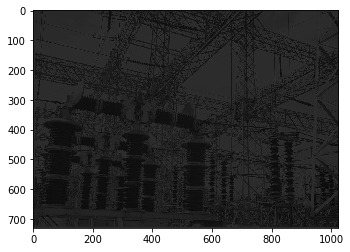

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray', vmin=0, vmax=255 )


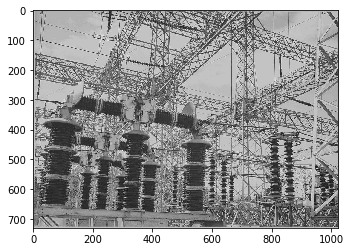

In [22]:
# Q1
img2 = (img - np.min(img)) * (255/(np.max(img) - np.min(img)))
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)

[25 50 75]


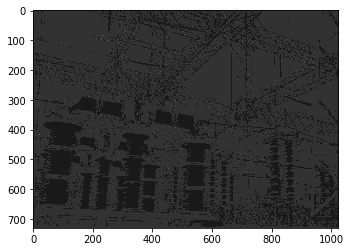

In [32]:
# Q2
from bisect import bisect 
breakpoints = list(range(0,255, 25))
data = list(img[:,:].flatten())

def bin_data(val, breakpoints=[60, 70, 80, 90], bins=[4,3,2,1]):
        i = bisect(breakpoints, val)
        return bins[i]
    
binned = [bin_data(i,breakpoints, breakpoints) for i in data]
    
hist = np.zeros(len(breakpoints))
for i in binned:
    idx = breakpoints.index(i)
    hist[idx] += 1

img_quant = np.array(binned).reshape(img.shape)
print(np.unique(img_quant))
plt.imshow(img_quant, cmap="gray", vmin=0, vmax=255)


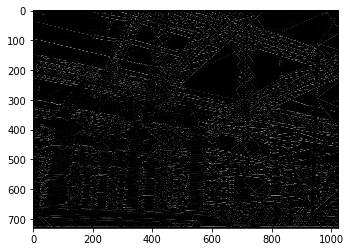

In [19]:
# Q3
sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

sbl_x = cv2.filter2D(img, -1, sobel_x)
sbl_y = cv2.filter2D(img, -1, sobel_y)

plt.imshow(sbl_x, cmap='gray', vmin=0, vmax=255)
plt.imshow(sbl_y, cmap='gray', vmin=0, vmax=255)

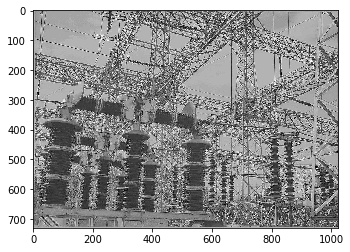

In [20]:
# Q4
laplacian = np.array([[0, -1, 0],[-1, 8, -1], [0,-1,0]])
lplcn = cv2.filter2D(img,-1, laplacian)

plt.imshow(lplcn, cmap='gray', vmin=0, vmax=255)
